17:20까지

문항1] [배점:50]
Seaborn package에 내장되어 있는 mpg 데이터셋에 대해서 다음 문제를 풀어보세요.
1) 실린더별 mpg의 평균을 막대그래프로 그리세요.
2) 배기량(displacement)과 마력(horsepower)의 산점도를 그리세요.
3) name 컬럼으로부터 제조사를 추출하세요.
4) 다음 두 개의 그래프를 한 줄에 두 개가 들어가게 그리세요.
   - 제조사별 모델의 개수(Top 10)를 막대그래프로 그리세요.
   - 제조사별 mpg의 평균(Top 10)을 막대그래프로 그리세요.

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [23]:
mpg = sns.load_dataset('mpg')  # mile per gallon 데이터
print(mpg.shape)
mpg.head()

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


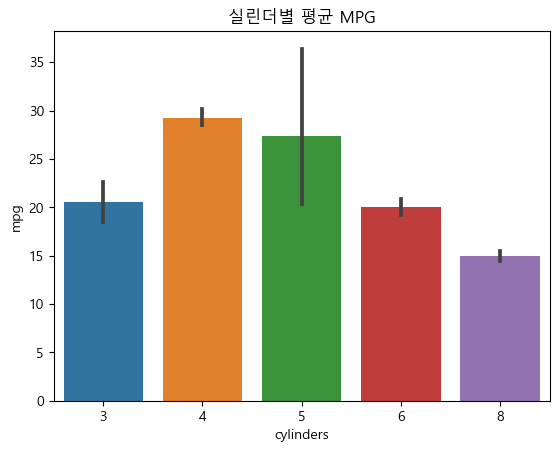

In [24]:
# 1) 실린더별 mpg의 평균을 막대그래프로 그리세요.
sns.barplot(x='cylinders', y='mpg', data=mpg)
plt.title('실린더별 평균 MPG');

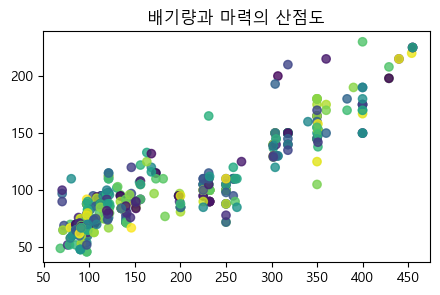

In [25]:
# 2) 배기량(displacement)과 마력(horsepower)의 산점도를 그리세요.
colors = np.random.rand(398)
plt.figure(figsize=(5,3))
X = mpg.displacement
Y = mpg.horsepower
plt.scatter(X, Y, c=colors, alpha=0.8)
plt.title('배기량과 마력의 산점도')
plt.show()

In [40]:
# 3) name 컬럼으로부터 제조사를 추출하세요.
mpg['manufacturer']=mpg.name.apply(lambda x: x.split()[0])
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,manufacturer
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford


In [81]:
df = mpg.pivot_table('name','manufacturer',aggfunc='count').sort_values('name',ascending=False).head(10)
df

,name
manufacturer,
ford,51
chevrolet,43
plymouth,31
amc,28
dodge,28
toyota,25
datsun,23
buick,17
pontiac,16


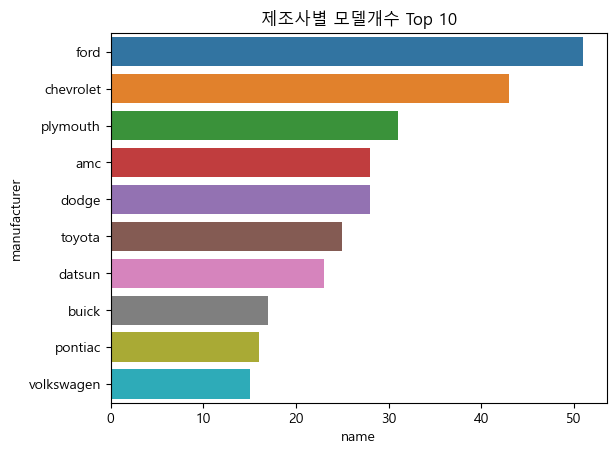

In [85]:
#- 제조사별 모델의 개수(Top 10)를 막대그래프로 그리세요.
# df.sort_values(by='name', ascending=False)
# plt.figure(figsize=(5,2))
# sns.barplot(y = 'name', x ='manufacturer', data=df.head(10))
# plt.title('제조사별 평균 MPG');

df1 = df.sort_values(by='name', ascending=False)
sns.barplot(x='name', y=df1.index[:11], data=df1.head(10))
plt.title('제조사별 모델개수 Top 10');

In [86]:
# 4) 다음 두 개의 그래프를 한 줄에 두 개가 들어가게 그리세요.
   #- 제조사별 mpg의 평균(Top 10)을 막대그래프로 그리세요.

df2 = mpg.pivot_table('mpg','manufacturer',aggfunc='count').sort_values('mpg',ascending=False).head(10)
df3 = df2.sort_values(by='mpg', ascending=False)
df3.head()

,mpg
manufacturer,
ford,51
chevrolet,43
plymouth,31
amc,28
dodge,28


Text(0.5, 1.0, '제조사별 mpg의 평균')

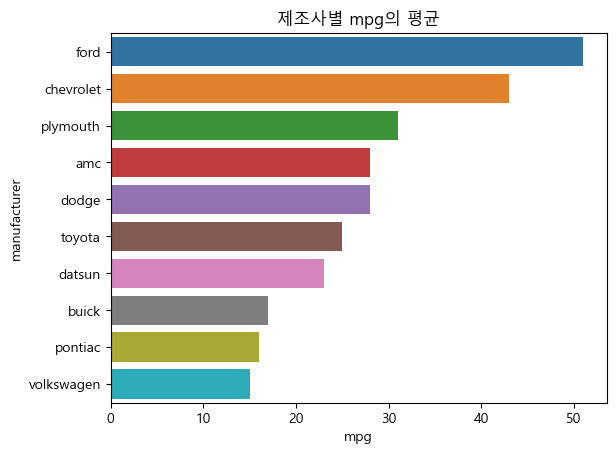

In [88]:
sns.barplot(x='mpg', y=df3.index[:11], data=df3.head(10))
plt.title('제조사별 mpg의 평균')